<a href="https://colab.research.google.com/github/SethupathyM/EDA-Hotel-Booking-Capstone-Project-1/blob/main/Copy_of_SH_Hotel_Booking_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initialization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Data frame mounting
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Modules/Python/Projects/EDA Hotel Booking/Copy of Hotel Bookings.csv')
df1=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Modules/Python/Projects/EDA Hotel Booking/Copy of Hotel Bookings.csv')

Mounted at /content/drive


In [2]:
# Counting the total null values in each columns
count = df1.isnull().sum()
#Percentage of total null values in each columns
percentage = round(count/df1.isnull().count(),4) *100
#concating the count and percentage
df_temp = pd.concat([count,percentage], axis = 1, keys = ['null_count', 'null_percent'])
df_temp

,null_count,null_percent
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


In [ ]:
df.head(15)

In [ ]:
df.shape

In [ ]:
df.info()

In [3]:
# DATA CLEANING -removing null values & changing children column to int type
df['children'] = df['children'].replace(np.nan, 0)
df['country'] = df['country'].replace(np.nan, 'no country')
df['agent'] = df['agent'].replace(np.nan, 0)
df.drop('company',axis=1,inplace=True)

df["children"]=df["children"].astype(int)

In [4]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [5]:
#Function to convert month_name to month_number

def num_month(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(n[m.index(month_name)])

#Function to convert single_digit_date to double_digit_date

def date_two_digit(single_digit_date):
  if single_digit_date<10:
    c=[1,2,3,4,5,6,7,8,9]
    d=['01','02','03','04','05','06','07','08','09']
    return(d[c.index(single_digit_date)])
  else:
    return(single_digit_date)

In [6]:
#Applying num_month function to df
df['month_num'] = df['arrival_date_month'].apply(num_month)
#Applying date_two_digit function to df
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].apply(date_two_digit)
#Assigning month_num to arrival_date_month
df['arrival_date_month'] = df['month_num']
#droping month_num
df.drop(['month_num'], axis = 1, inplace = True)

In [7]:
#Concating columns to get date in str format
df['date_'] = df['arrival_date_year'].astype(str)+ '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str) 

#Converting the date from str to DATE format 
df['date'] = pd.to_datetime(df.date_)

#droping temporary column
df.drop(['date_'], axis = 1,inplace=True)

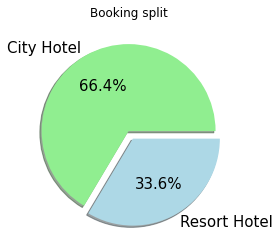

In [8]:
# Pie Chart representing Bookings 

values= df['hotel'].value_counts().tolist()
labe = df['hotel'].value_counts().index.tolist()

plt.pie(values ,labels=labe , radius=1,explode = [0,0.1],colors=['lightgreen','lightblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,7)
plt.title('Booking split')
plt.show()

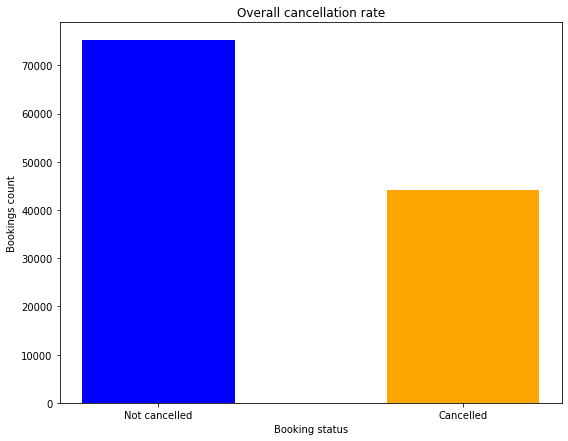

In [9]:
y=df['is_canceled'].value_counts().tolist()
z=['Not cancelled','Cancelled']
plt.ylabel('Bookings count')
plt.xlabel('Booking status')
plt.title('Overall cancellation rate')
plt.bar(z,y,width=0.5,color=['blue','orange'])
plt.rcParams['figure.figsize']=(9,7)
plt.show()

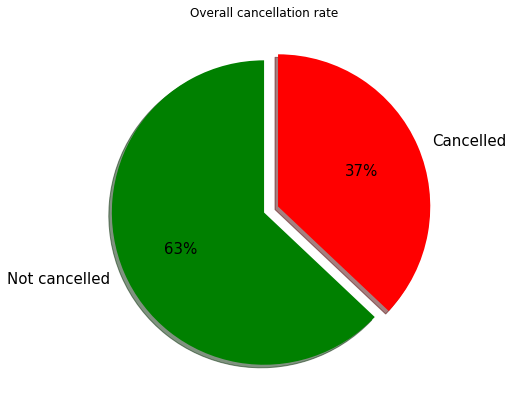

In [10]:
plt.pie(y ,labels=z ,explode = [0,0.1],colors=['green','red'],radius=1,startangle=90,textprops={'fontsize': 15}, autopct='%0.0f%%',shadow=True)
plt.title('Overall cancellation rate')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [11]:
#Extracting required columns

df_new= df[['hotel','is_canceled']]
dx=df_new.value_counts().tolist()
dy=['City Hotel','Resort Hotel']

#dx=[46228, 33102, 28938, 11122]

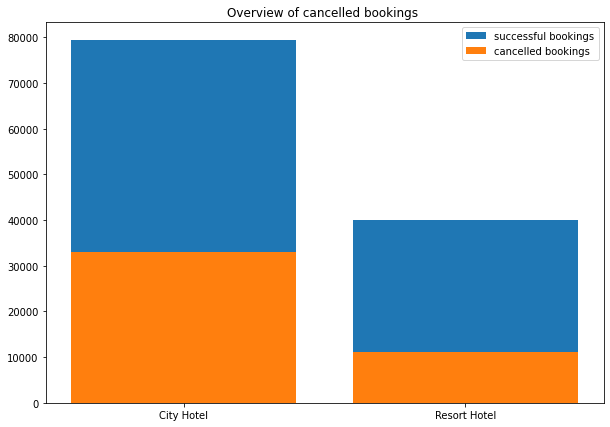

In [12]:
# Plotting Overview of cancelled bookings with repect to hotel types # Bar graph

yy=df['hotel'].value_counts().tolist()
plt.bar(dy,yy,label='successful bookings')
plt.bar(dy,dx[1::2],label='cancelled bookings')
plt.title('Overview of cancelled bookings ')
plt.legend()
plt.rcParams['figure.figsize']=(9,7)
plt.show()

In [13]:
def interchange(z):
  if z==0:
    return 1
  else:
    return 0

bb=df.loc[:,['is_canceled','country']]
bb['is_canceled']=bb['is_canceled'].apply(interchange)
cx_country= bb[bb['is_canceled'] == 1].groupby(['country']).sum().reset_index()
cx_country.rename({'is_canceled':'cx_count'},axis=1,inplace=True)

In [14]:
# Importing  Plotly.express to plot a choropleth map
import plotly.express as px

fig=px.choropleth(cx_country, locations = 'country',color= "cx_count", hover_name= "country",scope='world',title="Home country of visitors")
fig.show()

In [15]:
# Europe market without portugal
cc=df.loc[:,['is_canceled','country']]
cc['is_canceled']=cc['is_canceled'].apply(interchange)
dd=cc.groupby(df['country']).sum().sort_values(by='is_canceled',ascending=False).reset_index().query('is_canceled < 10000')
dd.rename({'is_canceled':'cx_count'},axis=1,inplace=True)


In [16]:
# Europe market 
fig=px.choropleth(dd, locations = 'country',color= 'cx_count', hover_name= 'country',scope='europe',title='Home country of visitors')
fig.show()

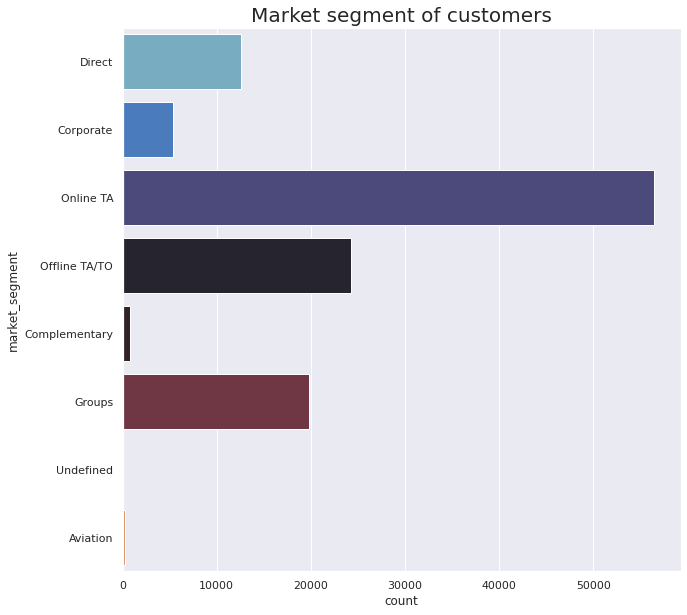

In [17]:
#Plotting Market segment of customers using seaborn

plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
sns.countplot(data=df, y ='market_segment',palette='icefire').set_title('Market segment of customers', fontsize = 20)
plt.show()

In [18]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [19]:
order=['Online TA','Direct', 'Corporate', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation']
       

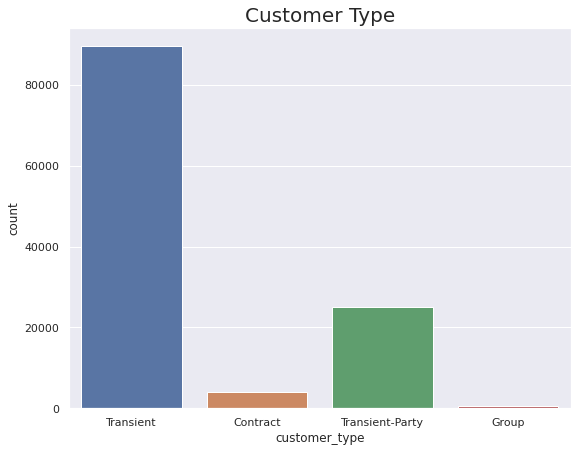

In [20]:
# Plotting customer type using Sea born----Bar graph
fig=sns.countplot(data =df, x = 'customer_type')
fig.set_title('Customer Type', fontsize = 20)
plt.show()

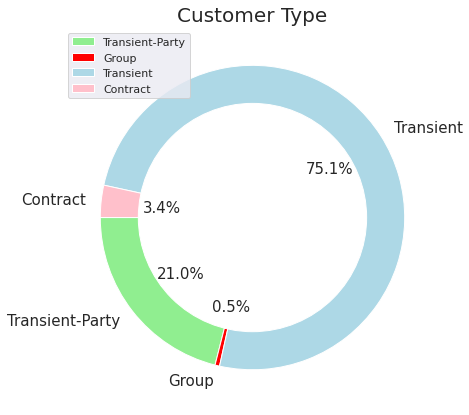

,count,customer_type
3,25124,Transient-Party
1,577,Group
2,89613,Transient
0,4076,Contract


In [21]:
# Plotting customer type using plotly----Pie chart
ee=df.loc[:,['customer_type']].groupby(['customer_type']).size().reset_index()
ee.rename({0:'count'},axis=1,inplace=True)
ff=ee.iloc[[3,1,2,0],[1,0]]

#pie plotting
plt.pie(ff['count']  ,labels=ff['customer_type'],colors=['lightgreen','red','lightblue','pink'],radius=1,startangle=180,textprops={'fontsize': 15},
        autopct='%0.1f%%')
plt.legend(loc='upper left')
plt.title('Customer Type',fontsize = 20)

#donut
cir=plt.Circle(xy=(0,0) , radius=0.75, facecolor='white')
plt.gca().add_artist(cir)
plt.show()
ff

In [62]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,07,27,01,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


In [84]:
# Function to convert month number to month name in temporary table Adr_sum
def month_name(num_month):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(m[n.index(num_month)])
  

In [96]:
# Applying function groupby and month_name
adr_sum = df.groupby(['arrival_date_month']).sum('adr').reset_index()
adr_sum['month_name'] = adr_sum['arrival_date_month'].apply(month_name)

In [94]:
# importing colors
import matplotlib.colors as mcolors

Text(0.5, 1.0, 'Revenue per month')

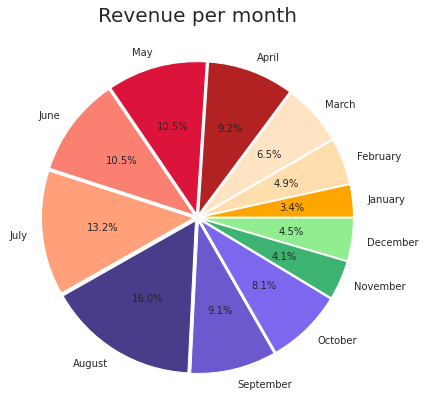

In [124]:
# Plotting the pie chart
plt.pie(adr_sum['adr'], labels = adr_sum['month_name'], explode = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025], colors = ['orange','navajowhite','bisque','firebrick','crimson','salmon','lightsalmon','darkslateblue','slateblue','mediumslateblue','mediumseagreen','lightgreen'], radius = 1, textprops = {'fontsize': 10}, autopct = '%0.1f%%' )
plt.title('Revenue per month', fontsize = 20)